# Assignement 1: Ford-Fulkerson Implementation and Analysis
## Objectives
1. Implement the Ford-Fulkerson method.
2. Conduct empirical experiments with networks of various sizes.
3. Analyze and compare execution times with theoretical complexity.
4. Create figures to illustrate your results.

In [21]:
# Test if your code is working
# Compare with the known working algorithm
# Nonlinear way of tested values
# Test best and wrost case scenarios
# Generate instanced, minimum 10-20 instances for every size
# We pick the largest size which takes 1min to compute
# we can make plot with time and complexity shown
# Store results after every experiment for future assignments, not only avarage time
# If you perform 100000 you should save 100000
# Be careful with generating graphs, they can be generated that source and sink cant connect etc. 
# We should show whitch fragment of code handle this or how we protect ourselves from this situation

## Method Implementation
This section is focused on implementing Ford-Fulkerson Method using Breath-First Search.

In [23]:
# Edge representation
mutable struct Edge
    u::Int
    v::Int
    flow::Int
    capacity::Int
end

# Graph representation
mutable struct MyGraph
    adj::Dict{Int, Vector{Edge}}
end

# Function for adding edge to the graph
function add_edge!(graph::MyGraph, u::Int, v::Int, capacity::Int)
    if !haskey(graph.adj, u)
        graph.adj[u] = Vector{Edge}()
    end
    
    if !haskey(graph.adj, v)
        graph.adj[v] = Vector{Edge}()
    end

    push!(graph.adj[u], Edge(u, v, 0, capacity))
    push!(graph.adj[v], Edge(v, u, 0, 0))
end

# BFS path-seeking algorithm
function bfs(graph::MyGraph, source::Int, sink::Int)
    visited = Dict{Int, Bool}()
    pi = Dict{Int, Edge}()
    queue = [source]
    visited[source] = true
    min_capacity = Dict{Int, Int}()
    min_capacity[source] = typemax(Int)
    
    while !isempty(queue)
        u::Int = popfirst!(queue)
        
        for edge::Edge in graph.adj[u]
            v::Int = edge.v
            res_capacity::Int = edge.capacity - edge.flow
            
            if !get(visited, v, false) && res_capacity > 0
                visited[v] = true
                pi[v] = edge
                min_capacity[v] = min(min_capacity[u], res_capacity)
                
                if v == sink
                    return true, pi, min_capacity[sink]
                end
                
                push!(queue, v)
            end
        end
    end
    
    return false, Dict{Int, Edge}(), 0
end



# Updating graph based on found path
function update_graph!(graph::MyGraph, pi::Dict{Int, Edge}, flow::Int)
    v = maximum(keys(pi))
    
    while haskey(pi, v)
        edge = pi[v]
        
        # Update forward edge flow
        for e in graph.adj[edge.u]
            if e.u == edge.u && e.v == edge.v
                e.flow += flow
                break
            end
        end
        
        # Update backward edge flow
        for e in graph.adj[edge.v]
            if e.u == edge.v && e.v == edge.u
                e.flow -= flow
                break
            end
        end
        
        v = edge.u
    end
end

update_graph! (generic function with 1 method)

In [24]:
# Ford-fulkerson method using bfs
function ford_fulkerson(graph::MyGraph, source::Int, sink::Int)
    max_flow = 0
    
    while true
        found, path, flow = bfs(graph, source, sink)
        
        if !found
            break
        end

        update_graph!(graph, path, flow)
        max_flow += flow
    end
    
    return max_flow
end

ford_fulkerson (generic function with 1 method)

In [25]:
# Simple test if the method is working fine on known example
graph = MyGraph(Dict{Int, Vector{Edge}}())

add_edge!(graph, 0, 1, 10)
add_edge!(graph, 0, 2, 5)
add_edge!(graph, 1, 2, 15)
add_edge!(graph, 1, 3, 10)
add_edge!(graph, 2, 3, 10)

max_flow = ford_fulkerson(graph, 0, 3)
println("Max Flow: ", max_flow)

Max Flow: 15


## Experiments setup

In [27]:
function generate_connected_graph(n::Int, m::Int, source::Int, sink::Int) # where n are nodes and m are edges
    graph = MyGraph(Dict{Int, Vector{Edge}}())

    # Line from source to sink
    for i in 1:n-1
        add_edge!(graph, i, i+1, rand(1:10))
    end

    # Add random edges to the graph
    for _ in 1:m - (n - 1)
        u, v = rand(1:n), rand(1:n)
        capacity = rand(1:10)
        
        # Avoid self-loops
        if u != v && !any(e -> e.u == u && e.v == v, graph.adj[u])
            add_edge!(graph, u, v, capacity)
        end
    end

    return graph
end

generate_connected_graph (generic function with 1 method)

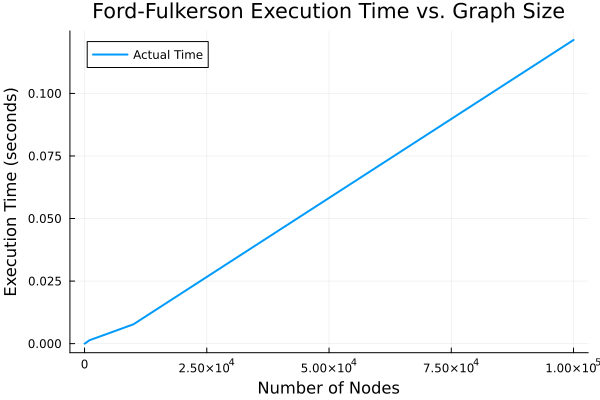

In [28]:
using Plots
using BenchmarkTools

sizes = [10, 100, 1000, 10000, 100000]
source = 1
sink = 10
times = []
expected_times = [sizes[1] * 4, sizes[2] * 4, sizes[3] * 4, sizes[4] * 4, sizes[5] * 4]

for size in sizes
    graph = generate_connected_graph(size, 3*size, source, sink)
    time_taken = @elapsed ford_fulkerson(graph, 1, size)
    push!(times, time_taken)
end

# Plotting both the execution times and expected times
plot(sizes, times, label="Actual Time", xlabel="Number of Nodes", ylabel="Execution Time (seconds)", title="Ford-Fulkerson Execution Time vs. Graph Size", linewidth=2)
#plot!(sizes, expected_times, label="Expected Time (O(n*m))", linestyle=:dash, linewidth=2)
